In [1]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

In [28]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)   
    
    
np.set_printoptions(precision=3)

In [5]:
valid_survey_input = pd.read_csv('mspa-survey-data.csv')

# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

In [7]:
print('\nContents of initial survey data ---------------')

print('\nNumber of Respondents =', len(valid_survey_input)) 


Contents of initial survey data ---------------

Number of Respondents = 207


In [8]:
print(valid_survey_input.columns)
#we can see here that the Respondent ID is no longer a column name since it's the index. 

Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


In [9]:
print(pd.DataFrame.head(valid_survey_input)) 
#Here we can see the first few values of each of the columns. This illustrates how students distribute the points for each platform about their personal interest, professional need and industry relevance. 

              Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  \
RespondentID                                                        
5135740122                          0                           0   
5133300037                         10                          10   
5132253300                         20                           0   
5132096630                         10                          10   
5131990362                         20                           0   

              Personal_Python  Personal_R  Personal_SAS  \
RespondentID                                              
5135740122                  0          50            50   
5133300037                 50          30             0   
5132253300                 40          40             0   
5132096630                 25          35            20   
5131990362                  0          70            10   

              Professional_JavaScalaSpark  Professional_JavaScriptHTMLCSS  \
RespondentID             

In [10]:
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})

In [11]:
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']

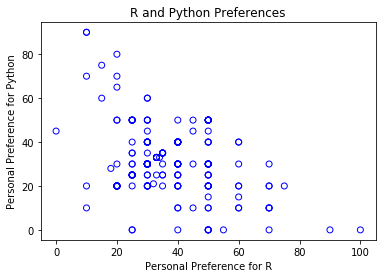

In [13]:
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Preferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

#This graph shows us that the majority of the values in the personal category fall in the center of this graph.
#The center of this graph contains numbers between 20-50 for python and 20-60 for R. 
#This means that most respondents gave the highest values to both Python and R instead of Spark, Java, etc. 

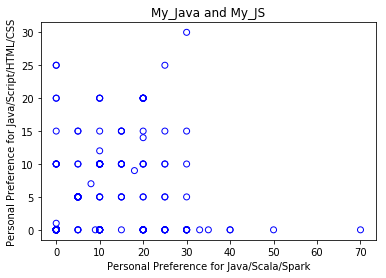

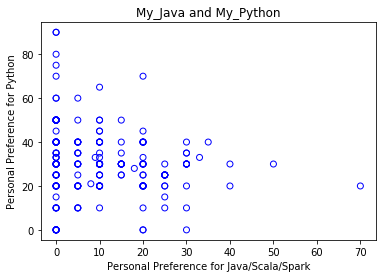

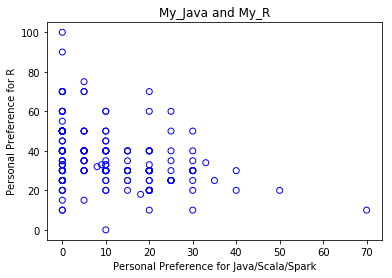

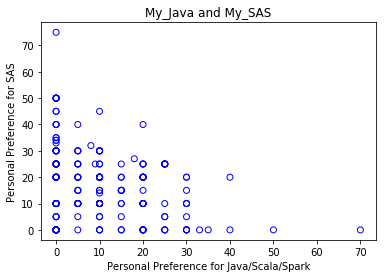

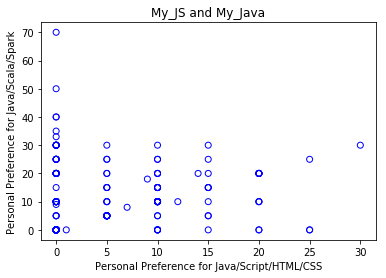

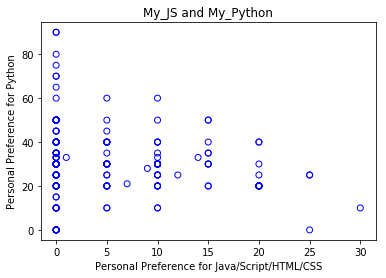

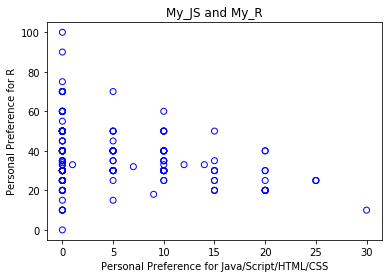

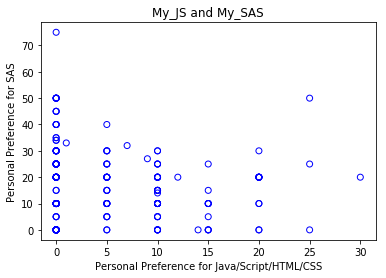

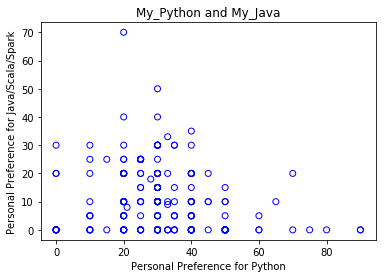

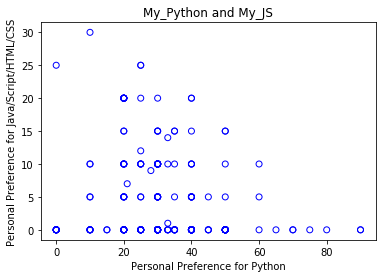

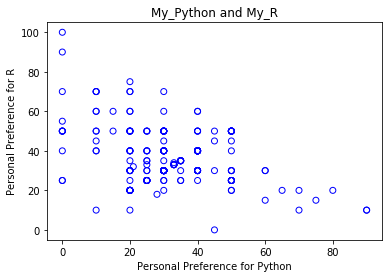

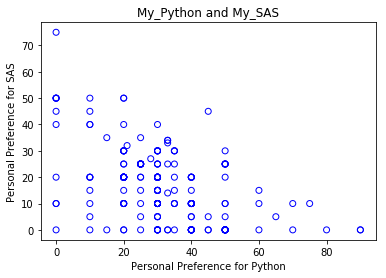

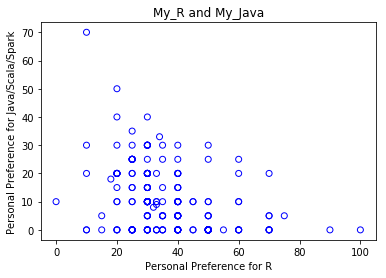

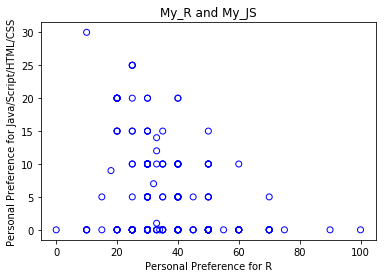

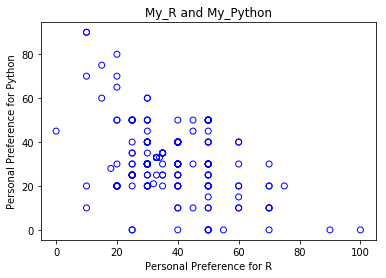

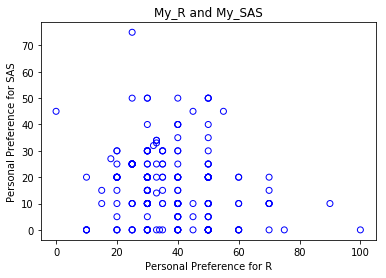

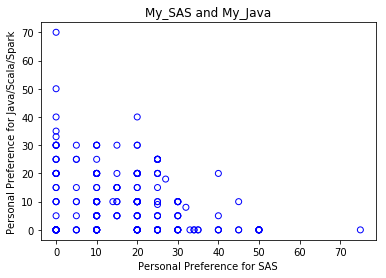

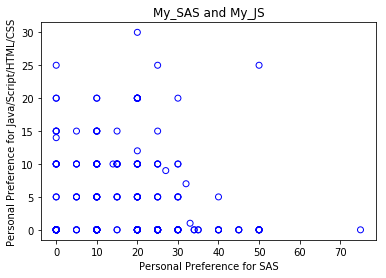

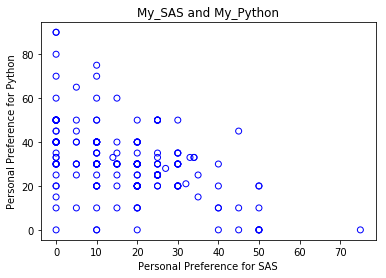

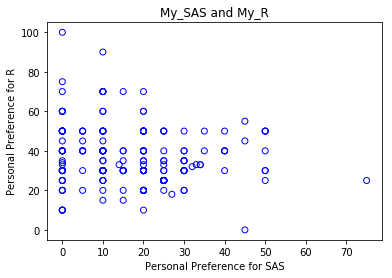

In [14]:

survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]    

# create a set of scatter plots for personal preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  

<Figure size 432x288 with 0 Axes>

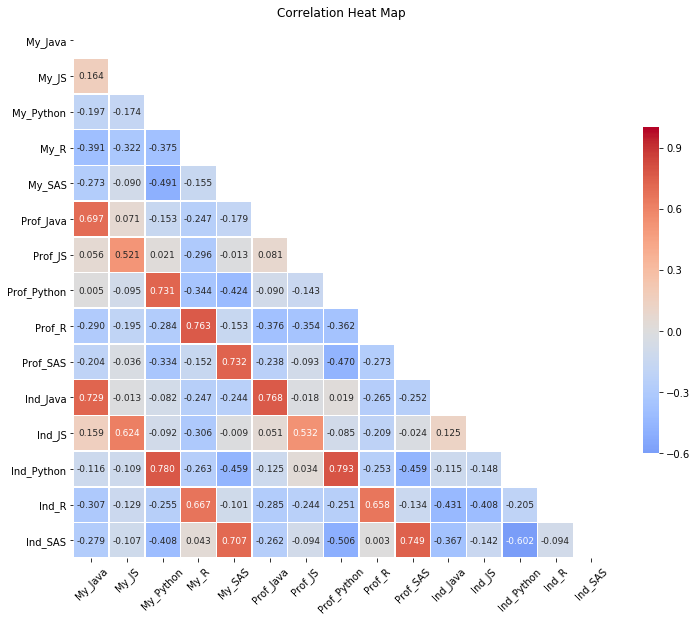

In [15]:
corr_chart(df_corr = software_df) 
#There are too many relationships between variables here to analyze briefly. But we can say that the 
#stronger correlations in the graph belong between relationships of the same languages. This means that
#respondents' desire to learn languages(My_....) is strongly correlated with how important the languages are
#for the jobs they are aspiring to obtain and also it's strongly correlated with the languages that are 
#relevant in the industry. 
#The rest of the correlations are not significant in my opinion since I consider minimum 0.65 to 
#be a good correlation but the closest one that doesn't fall in the cateogry previously described is the 
#relationship between Industry Python and Industry SAS, the number tells us that about 60% of respondents
#that showed high interest in Python also showed in SAS. 


In [16]:
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())
#The descriptive stats below give Python and R a big win with R in first place and SAS comes behind these two. 
#The values for relevance for languages across the 3 questions vary slightly which tells us that 
#the desire for respondents is almost perfectly linearly related to what the industry and the jobs
#available are demanding. 


Descriptive statistics for survey data ---------------
          My_Java       My_JS   My_Python        My_R      My_SAS   Prof_Java  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   
max     70.000000   30.000000   90.000000  100.000000   75.000000   80.000000   

          Prof_JS  Prof_Python      Prof_R    Prof_SAS    Ind_Java  \
count  207.000000   207.000000  207.000000  207.000000  207.000000   
mean     5.840580    30.028986   36.415459   18.463768   11.942029   
std 

In [32]:
classes_df = survey_df.loc[:, 'Python_Course_Interest':'Systems_Analysis_Course_Interest']

print('\nDescriptive statistics for survey data ---------------')
print(classes_df.describe())




Descriptive statistics for survey data ---------------
       Python_Course_Interest  Foundations_DE_Course_Interest  \
count              206.000000                      200.000000   
mean                73.529126                       58.045000   
std                 29.835429                       32.588079   
min                  0.000000                        0.000000   
25%                 53.000000                       29.500000   
50%                 82.500000                       60.000000   
75%                100.000000                       89.250000   
max                100.000000                      100.000000   

       Analytics_App_Course_Interest  Systems_Analysis_Course_Interest  
count                     203.000000                        200.000000  
mean                       55.201970                         53.630000  
std                        34.147954                         33.539493  
min                         0.000000                          0.00

In [17]:
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())

#These stats tell us that 20 people did not complete this part of the survey because there were 207 
#responses as shown above and only 187 are shown on the count below. It also tell us that the average 
#respondent has taken 6 classes which means that most of them were halfway through the Master's. 


Descriptive statistics for courses completed ---------------
count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Courses_Completed, dtype: float64


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [20]:
X = survey_df['Courses_Completed'].dropna()
len(X)

#Since we still have 187 values as in the previous cell it means that apparently there were no missing values.

187

C:\Users\gilad\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


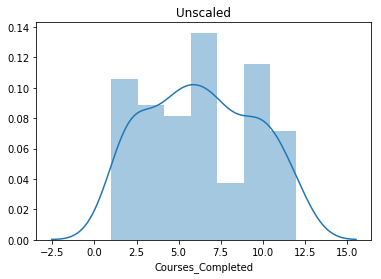

In [24]:
unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  



ValueError: Expected 2D array, got 1D array instead:
array=[ 6.  4.  7.  7.  5. 11.  2.  3.  6.  3.  2.  7.  3.  4.  2. 12.  7.  5.
  6.  8. 12.  9. 12.  2.  3.  5.  7.  2.  9.  7.  7.  7.  1.  5.  5. 11.
  5.  6. 10.  6.  9. 10.  4.  4.  7.  5.  3.  7. 10.  7.  6.  5.  5.  3.
  6.  7.  6.  8. 10.  5.  2.  3.  7.  5.  2.  8.  4.  7.  8.  5. 11.  1.
  2. 12.  3.  7. 10.  7.  3.  2.  9.  1. 11. 10.  9.  2.  4.  6.  1.  6.
  4.  5.  1. 10. 12.  6. 10. 11.  8.  8.  3.  7. 10.  6.  8.  5. 11. 10.
  7. 11.  2.  9.  2.  9. 10. 10.  9. 11.  7.  8.  2. 10.  8.  2.  4.  5.
  2.  9.  4.  5.  2. 10.  5.  2.  9.  5. 10.  2.  2. 11.  5. 12.  2.  9.
  5.  4. 12.  2. 10.  8.  6.  3.  5. 10.  5.  7.  2.  6.  9. 11.  9. 12.
 11.  7.  3.  4.  7.  6.  5.  4.  2.  4. 12.  2.  8. 10.  7. 12. 10.  9.
  1.  2. 10.  6.  3.  5.  7.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

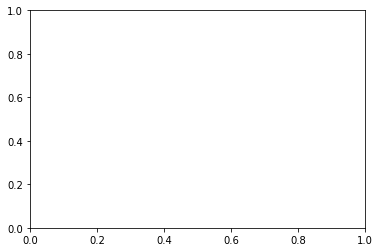

In [25]:
 standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X)).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

ValueError: Expected 2D array, got 1D array instead:
array=[ 6.  4.  7.  7.  5. 11.  2.  3.  6.  3.  2.  7.  3.  4.  2. 12.  7.  5.
  6.  8. 12.  9. 12.  2.  3.  5.  7.  2.  9.  7.  7.  7.  1.  5.  5. 11.
  5.  6. 10.  6.  9. 10.  4.  4.  7.  5.  3.  7. 10.  7.  6.  5.  5.  3.
  6.  7.  6.  8. 10.  5.  2.  3.  7.  5.  2.  8.  4.  7.  8.  5. 11.  1.
  2. 12.  3.  7. 10.  7.  3.  2.  9.  1. 11. 10.  9.  2.  4.  6.  1.  6.
  4.  5.  1. 10. 12.  6. 10. 11.  8.  8.  3.  7. 10.  6.  8.  5. 11. 10.
  7. 11.  2.  9.  2.  9. 10. 10.  9. 11.  7.  8.  2. 10.  8.  2.  4.  5.
  2.  9.  4.  5.  2. 10.  5.  2.  9.  5. 10.  2.  2. 11.  5. 12.  2.  9.
  5.  4. 12.  2. 10.  8.  6.  3.  5. 10.  5.  7.  2.  6.  9. 11.  9. 12.
 11.  7.  3.  4.  7.  6.  5.  4.  2.  4. 12.  2.  8. 10.  7. 12. 10.  9.
  1.  2. 10.  6.  3.  5.  7.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

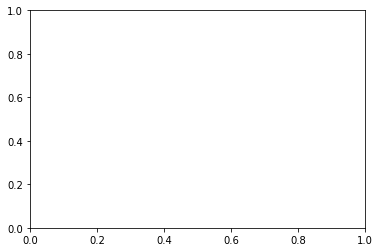

In [26]:
minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X)).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

C:\Users\gilad\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


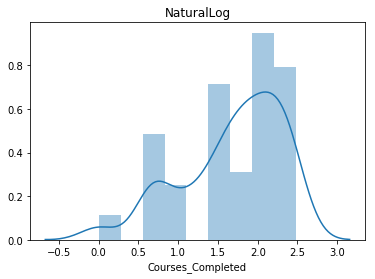

In [27]:
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  
